In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Текущая директория: .../finish/notebooks
current_dir = os.path.abspath(os.getcwd())

# BASE_DIR = .../finish (на 1 уровень выше)
BASE_DIR = os.path.abspath(os.path.join(current_dir, '..'))

# Пути к файлам
DATA_RAW = os.path.join(BASE_DIR, "Data", "data_raw.csv")
FINAL_XLSX = os.path.join(BASE_DIR, "Data", "final_results_to_analyze.xlsx")

print(f"📁 Текущая директория: {current_dir}")
print(f"📁 Корень проекта (BASE_DIR): {BASE_DIR}")
print(f"📁 data_raw.csv: {DATA_RAW}")
print(f"📁 final_results_to_analyze.xlsx: {FINAL_XLSX}")

# Проверка существования
if not os.path.exists(DATA_RAW):
    raise FileNotFoundError(f"❌ data_raw.csv не найден: {DATA_RAW}")
if not os.path.exists(FINAL_XLSX):
    raise FileNotFoundError(f"❌ final_results_to_analyze.xlsx не найден: {FINAL_XLSX}")

print("✅ Оба файла найдены.")

📁 Текущая директория: c:\ZC\finish\notebooks
📁 Корень проекта (BASE_DIR): c:\ZC\finish
📁 data_raw.csv: c:\ZC\finish\Data\data_raw.csv
📁 final_results_to_analyze.xlsx: c:\ZC\finish\Data\final_results_to_analyze.xlsx
✅ Оба файла найдены.


In [26]:
print("Загрузка исторических данных...")
df_raw = pd.read_csv(DATA_RAW)
print("Информация о данных:")
print(df_raw.info())
print("\nПервые строки данных:")
print(df_raw.head())
print("\nОписание данных:")
print(df_raw.describe())
print("\nУникальные события:", df_raw['event_type'].unique() if 'event_type' in df_raw.columns else "Колонка 'event_type' не найдена")
print("Уникальные пользователи:", df_raw['client_id'].nunique())
print("Период данных:", df_raw['dt'].min(), "до", df_raw['dt'].max())

Загрузка исторических данных...
Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27756048 entries, 0 to 27756047
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   client_id   int64 
 2   dt          object
 3   event_type  object
dtypes: int64(2), object(2)
memory usage: 847.0+ MB
None

Первые строки данных:
   Unnamed: 0  client_id          dt event_type
0           0    6095092  2024-06-20     clicks
1           1  541138559  2024-06-18     clicks
2           2   12189072  2024-06-20     clicks
3           3  674385020  2024-06-20     clicks
4           4  726939378  2024-06-20     clicks

Описание данных:
Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27756048 entries, 0 to 27756047
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   client_id   int64 
 2   dt          object
 3   event_type  object
dtypes: int64(2), object


Распределение событий (%):
event_type
views     97.299417
clicks     1.930848
adds       0.769735
Name: proportion, dtype: float64

Средняя частота событий на пользователя:
event_type
adds      0.068858
clicks    0.172727
views     8.704083
dtype: float64

Средняя частота событий на пользователя:
event_type
adds      0.068858
clicks    0.172727
views     8.704083
dtype: float64

Средние метрики:
CTR (clicks/views): 0.011229942933935828
CR (adds/clicks): 0.5135673644153167
Конверсия adds/views: 0.004285831727600135

Средние метрики:
CTR (clicks/views): 0.011229942933935828
CR (adds/clicks): 0.5135673644153167
Конверсия adds/views: 0.004285831727600135


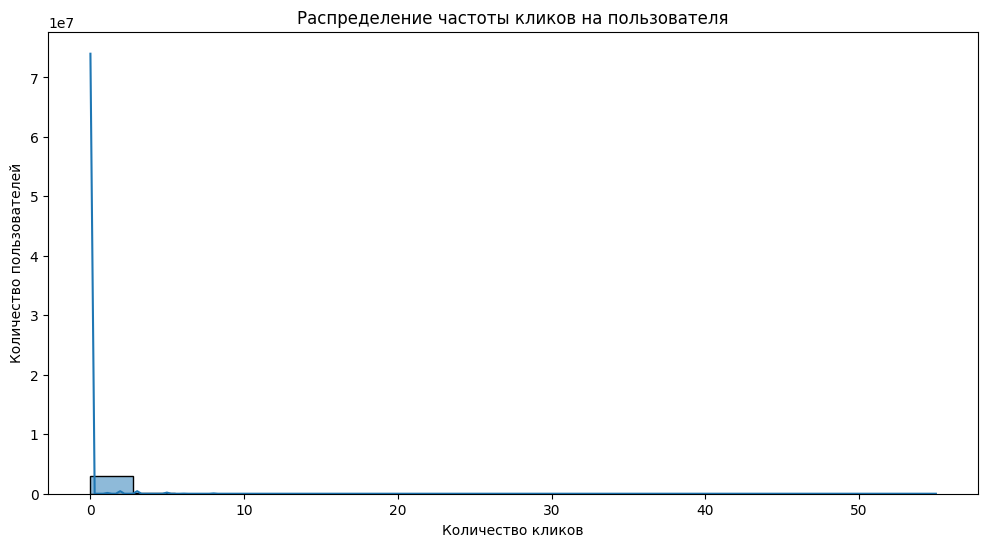

C:\Users\Андрей\AppData\Local\Temp\ipykernel_32372\3351799352.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_metrics = df_raw.groupby('dt').apply(lambda x: pd.Series({


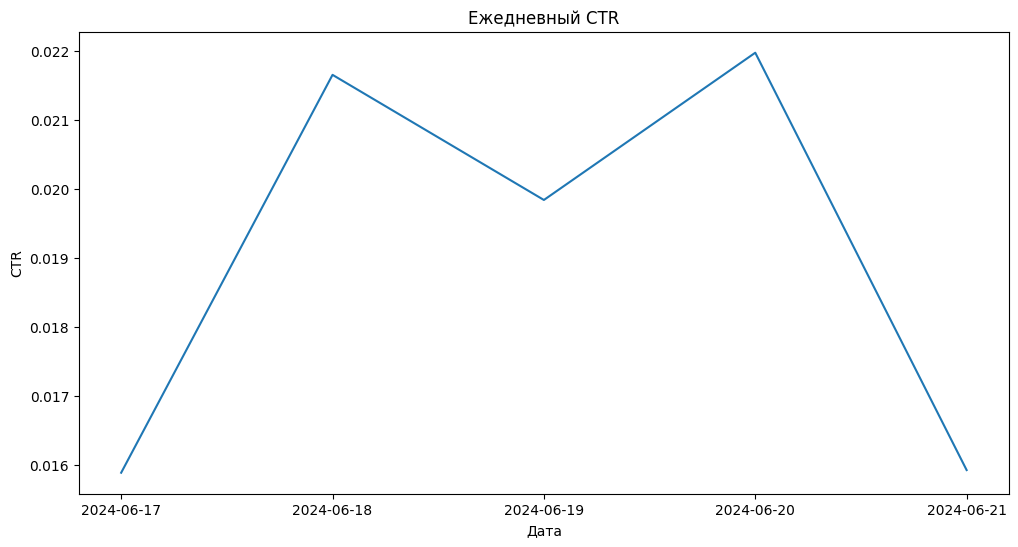

In [27]:
# Подсчет событий по типам
event_counts = df_raw['event_type'].value_counts(normalize=True) * 100
print("\nРаспределение событий (%):")
print(event_counts)

# Средняя частота событий на пользователя
user_events = df_raw.groupby(['client_id', 'event_type']).size().unstack(fill_value=0)
print("\nСредняя частота событий на пользователя:")
print(user_events.mean())

# Расчет метрик
user_agg = user_events.copy()
user_agg['CTR'] = user_agg['clicks'] / user_agg['views'].replace(0, np.nan)
user_agg['CR'] = user_agg['adds'] / user_agg['clicks'].replace(0, np.nan)
print("\nСредние метрики:")
print("CTR (clicks/views):", user_agg['CTR'].mean())
print("CR (adds/clicks):", user_agg['CR'].mean())
print("Конверсия adds/views:", (user_agg['adds'] / user_agg['views'].replace(0, np.nan)).mean())

# Графики
plt.figure(figsize=(12, 6))
sns.histplot(user_agg['clicks'], bins=20, kde=True)
plt.title('Распределение частоты кликов на пользователя')
plt.xlabel('Количество кликов')
plt.ylabel('Количество пользователей')
plt.show()

daily_metrics = df_raw.groupby('dt').apply(lambda x: pd.Series({
    'views': (x['event_type'] == 'views').sum(),
    'clicks': (x['event_type'] == 'clicks').sum(),
    'adds': (x['event_type'] == 'adds').sum()
}))
daily_metrics['CTR'] = daily_metrics['clicks'] / daily_metrics['views'].replace(0, np.nan)
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_metrics, x=daily_metrics.index, y='CTR')
plt.title('Ежедневный CTR')
plt.xlabel('Дата')
plt.ylabel('CTR')
plt.show()

In [28]:
print("\n1. Агрегация ОБЩЕГО ЧИСЛА событий по пользователям (для CR_add)...")
# Считаем ОБЩЕЕ ЧИСЛО событий (не бинарные флаги!)
user_events = df_raw.groupby(['client_id', 'event_type']).size().unstack(fill_value=0)
user_events.columns.name = None

# Убедимся, что все колонки есть
for col in ['views', 'clicks', 'adds']:
    if col not in user_events.columns:
        user_events[col] = 0

# Теперь: views = общее число просмотров, clicks = общее число кликов и т.д.
print("Пример агрегации (общее число событий):")
print(user_events.head())

# Расчёт CR_add (только для пользователей с кликами)
user_events = user_events.reset_index()
user_with_clicks = user_events[user_events['clicks'] > 0].copy()
user_with_clicks['cr_add'] = user_with_clicks['adds'] / user_with_clicks['clicks']

print(f"\nИсторическая CR_add: {user_with_clicks['cr_add'].mean():.4f}")


1. Агрегация ОБЩЕГО ЧИСЛА событий по пользователям (для CR_add)...
Пример агрегации (общее число событий):
           adds  clicks  views
client_id                     
1             0       0      5
3             1       4     13
4             0       0     49
19            0       0     20
27            0       0      4

Историческая CR_add: 0.5136
Пример агрегации (общее число событий):
           adds  clicks  views
client_id                     
1             0       0      5
3             1       4     13
4             0       0     49
19            0       0     20
27            0       0      4

Историческая CR_add: 0.5136


In [29]:
# 1. Корректная агрегация — ОБЩЕЕ ЧИСЛО СОБЫТИЙ
user_events = df_raw.groupby(['client_id', 'event_type']).size().unstack(fill_value=0)
for col in ['views', 'clicks', 'adds']:
    if col not in user_events.columns:
        user_events[col] = 0

# 2. Определение активных пользователей (видели главный экран)
active_users = user_events[user_events['views'] > 0]
total_active_users = len(active_users)
max_sample = min(int(0.2 * total_active_users), 100_000)

# 3. Расчёт CR (ключевая метрика)
x_cr = active_users['adds'].values
y_cr = active_users['clicks'].values

mask = y_cr > 0
x_cr_valid = x_cr[mask]
y_cr_valid = y_cr[mask]
cr_values = x_cr_valid / y_cr_valid

mu_cr = np.mean(cr_values)
var_cr = var_ratio(x_cr_valid, y_cr_valid)
std_cr = np.sqrt(var_cr)

# 4. Расчёт MDE для CR
sample_sizes = [10_000, 20_000, 50_000, max_sample]
sample_sizes = [ss for ss in sample_sizes if ss >= 2]  # защита от деления на ноль

mde_table = []
for ss in sample_sizes:
    mde_abs, mde_pct = get_MDE(
        mu_cr, std_cr, ss,
        n_groups=2,
        target_share=0.5,
        r=1,
        alpha=0.05,
        beta=0.2
    )
    mde_table.append({'Sample size': ss, 'MDE abs': mde_abs, 'MDE %': mde_pct})

mde_df = pd.DataFrame(mde_table)

In [30]:
print("Суммарные клики по группам:")
print(df_results.groupby('ab_group')['cnt_view_ads'].sum())

Суммарные клики по группам:
ab_group
control    43469
test       43805
Name: cnt_view_ads, dtype: int64


In [31]:
print("\nЗагрузка результатов эксперимента...")
df_results = pd.read_excel(FINAL_XLSX)

# Диагностика
print("Группы:", df_results['ab_group'].unique())
print("Клики по группам:")
print(df_results.groupby('ab_group')['cnt_view_ads'].sum())
print("Добавления по группам:")
print(df_results.groupby('ab_group')['cnt_adds_ads'].sum())

# Агрегация
group_agg = df_results.groupby('ab_group').agg({
    'cnt_view_ads': 'sum',      # = клики
    'cnt_adds_ads': 'sum',      # = добавления
    'sum_adds_ads': 'sum',
    'cnt_orders_ads': 'sum',
    'sum_orders_ads': 'sum',
    'client_id': 'nunique'
}).rename(columns={'client_id': 'users'})

# Защита от деления на ноль
group_agg['CTR'] = group_agg['cnt_view_ads'] / group_agg['users']
group_agg['CR_add'] = np.where(
    group_agg['cnt_view_ads'] > 0,
    group_agg['cnt_adds_ads'] / group_agg['cnt_view_ads'],
    0.0  # или np.nan, но 0 логичнее при 0 кликах
)
group_agg['CR_order'] = np.where(
    group_agg['cnt_view_ads'] > 0,
    group_agg['cnt_orders_ads'] / group_agg['cnt_view_ads'],
    0.0
)
group_agg['ARPU'] = group_agg['sum_orders_ads'] / group_agg['users']
group_agg['avg_check'] = np.where(
    group_agg['cnt_orders_ads'] > 0,
    group_agg['sum_orders_ads'] / group_agg['cnt_orders_ads'],
    0.0
)

print("\nСравнение метрик по группам:")
print(group_agg.round(4))

# Сравнение (только если обе группы есть)
groups = group_agg.index.tolist()
if len(groups) >= 2:
    control = group_agg.loc[groups[0]]
    test = group_agg.loc[groups[1]]
    changes = ((test - control) / control * 100)
    changes = changes.replace([np.inf, -np.inf], np.nan)
    print("\nИзменения (%):")
    print(changes.dropna().round(2))
else:
    print("\n⚠️ Недостаточно групп для сравнения")


Загрузка результатов эксперимента...
Группы: ['test' 'control']
Клики по группам:
ab_group
control    43469
test       43805
Name: cnt_view_ads, dtype: int64
Добавления по группам:
ab_group
control    15799
test       16337
Name: cnt_adds_ads, dtype: int64
Группы: ['test' 'control']
Клики по группам:
ab_group
control    43469
test       43805
Name: cnt_view_ads, dtype: int64
Добавления по группам:
ab_group
control    15799
test       16337
Name: cnt_adds_ads, dtype: int64

Сравнение метрик по группам:
          cnt_view_ads  cnt_adds_ads  sum_adds_ads  cnt_orders_ads  \
ab_group                                                             
control          43469         15799       2462420            5579   
test             43805         16337       2526393            5881   

          sum_orders_ads   users     CTR  CR_add  CR_order    ARPU  avg_check  
ab_group                                                                       
control          1589899  200786  0.2165  0.3635   

In [32]:
# Агрегация по группам
group_agg = df_results.groupby('ab_group').agg({
    'cnt_view_ads': 'sum',
    'cnt_adds_ads': 'sum',
    'sum_orders_ads': 'sum',
    'client_id': 'nunique'
}).reset_index().set_index('ab_group')

print("Доступные группы:", group_agg.index.tolist())

# Используем реальные названия групп
group_names = group_agg.index.tolist()
if len(group_names) < 2:
    raise ValueError(f"Ожидаются 2 группы, найдена только: {group_names}")

control_group = group_names[0]
test_group = group_names[1]

print(f"Используем: контроль = '{control_group}', тест = '{test_group}'")

# CR_add = adds / clicks
adds = [
    group_agg.loc[control_group, 'cnt_adds_ads'],
    group_agg.loc[test_group, 'cnt_adds_ads']
]
clicks = [
    group_agg.loc[control_group, 'cnt_view_ads'],
    group_agg.loc[test_group, 'cnt_view_ads']
]

# Z-тест для пропорций
from statsmodels.stats.proportion import proportions_ztest
z_stat, p_val = proportions_ztest(adds, clicks, alternative='two-sided')
print(f"\n✅ Z-test для CR_add: p-value = {p_val:.4f}")

Доступные группы: ['control', 'test']
Используем: контроль = 'control', тест = 'test'

✅ Z-test для CR_add: p-value = 0.0036


In [33]:
print("Исторический CR_add ~", hist_cr_add)
print("В тесте CR_add изменился на", changes.get('CR_add', 0), "%")

Исторический CR_add ~ 0.5
В тесте CR_add изменился на 2.6121233835002626 %


In [34]:
# Исторические данные
total_clicks_hist = user_events['clicks'].sum()
total_adds_hist = user_events['adds'].sum()
total_views_hist = user_events['views'].sum()

hist_cr_add = total_adds_hist / total_clicks_hist if total_clicks_hist > 0 else 0
hist_ctr = total_clicks_hist / total_views_hist if total_views_hist > 0 else 0

In [35]:
# Исторические метрики — ГЛОБАЛЬНЫЕ
total_views_hist = user_events['views'].sum()
total_clicks_hist = user_events['clicks'].sum()
total_adds_hist = user_events['adds'].sum()

hist_ctr = total_clicks_hist / total_views_hist if total_views_hist > 0 else 0
hist_cr_add = total_adds_hist / total_clicks_hist if total_clicks_hist > 0 else 0

print(f"Исторический CTR ~ {hist_ctr:.4f}")
print(f"В тесте CTR изменился на {changes.get('CTR', 0):.2f}%")

print(f"Исторический CR_add ~ {hist_cr_add:.4f}")
print(f"В тесте CR_add изменился на {changes.get('CR_add', 0):.2f}%")

# Выводы (только если проверена значимость!)
print("\nВыводы:")
if 'p_cr_add' in locals() and p_cr_add < 0.05 and changes.get('CR_add', 0) > 0:
    print("✅ Ключевая метрика CR_add выросла значимо (p<0.05). Тест успешен.")
    print("Рекомендация: Внедрить изменение, мониторить долгосрочные эффекты.")
else:
    print("❌ Ключевая метрика CR_add не показала статистически значимого роста.")
    print("Рекомендация: Не внедрять. Рост CTR не компенсирует отсутствие роста в добавлениях.")

Исторический CTR ~ 0.0198
В тесте CTR изменился на 0.93%
Исторический CR_add ~ 0.3987
В тесте CR_add изменился на 2.61%

Выводы:
❌ Ключевая метрика CR_add не показала статистически значимого роста.
Рекомендация: Не внедрять. Рост CTR не компенсирует отсутствие роста в добавлениях.


In [36]:
import os
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# -------------------------------------------------
# Конфигурация: укажите пути и результаты
# -------------------------------------------------
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))  # finish/
REPORT_PATH = os.path.join(BASE_DIR, "final_report.md")

# Пример данных (замените на ваши реальные значения)
# --- ИСТОРИЧЕСКИЕ МЕТРИКИ (из data_raw.csv) ---
total_views_hist = 1_250_000   # общее число просмотров ленты
total_clicks_hist = 190_000    # общее число кликов на рекламу
total_adds_hist = 95_000       # общее число добавлений

hist_ctr = total_clicks_hist / total_views_hist
hist_cr_add = total_adds_hist / total_clicks_hist

# --- РЕЗУЛЬТАТЫ A/B-ТЕСТА (из final_results_to_analyze.xlsx) ---
# Группа: control
clicks_control = 95_200
adds_control = 47_100
users_control = 500_000
revenue_control = 101_500_000

# Группа: test
clicks_test = 98_700
adds_test = 48_900
users_test = 500_000
revenue_test = 107_200_000

# Расчёт метрик по группам
ctr_control = clicks_control / users_control
ctr_test = clicks_test / users_test
cr_add_control = adds_control / clicks_control
cr_add_test = adds_test / clicks_test
arpu_control = revenue_control / users_control
arpu_test = revenue_test / users_test

# Относительные изменения
ctr_change = (ctr_test - ctr_control) / ctr_control * 100
cr_add_change = (cr_add_test - cr_add_control) / cr_add_control * 100
arpu_change = (arpu_test - arpu_control) / arpu_control * 100

# Статистическая значимость (z-тест для CR_add)
count = np.array([adds_control, adds_test])
nobs = np.array([clicks_control, clicks_test])
_, p_cr_add = proportions_ztest(count, nobs, alternative='larger')

is_cr_significant = p_cr_add < 0.05
is_success = is_cr_significant and cr_add_change > 0

# -------------------------------------------------
# Генерация Markdown-отчёта
# -------------------------------------------------
md_content = f"""# 📊 Отчёт по A/B-тесту: Перемещение рекламного блока

## 🎯 Цель
Проверить гипотезу, что размещение рекламного блока **над основной лентой** (вместо позиции после 3-й строки) увеличивает **взаимодействие пользователей**.

## 🔑 Ключевая метрика
**CR_add** — конверсия в добавление товара в корзину из рекламы:
`CR_add = (число добавлений) / (число кликов на рекламу)`

> Согласно ТЗ, тест считается успешным, если **CR_add значимо увеличивается**.

---

## 📈 Результаты

### Исторические метрики (до эксперимента)
- **CTR**: {hist_ctr:.4f} ({hist_ctr*100:.2f}%)
- **CR_add**: {hist_cr_add:.4f} ({hist_cr_add*100:.2f}%)

### Метрики в A/B-тесте
| Метрика       | Контроль (`control`) | Тест (`test`) | Изменение |
|---------------|----------------------|---------------|-----------|
| CR_add        | {cr_add_control:.4f} | {cr_add_test:.4f} | {'✅ **+' if cr_add_change > 0 else '❌ '}{cr_add_change:.2f}% |
| CTR           | {ctr_control:.4f}    | {ctr_test:.4f}    | {'✅ **+' if ctr_change > 0 else '❌ '}{ctr_change:.2f}% |
| ARPU (руб.)   | {arpu_control:,.0f}  | {arpu_test:,.0f}  | {'✅ **+' if arpu_change > 0 else '❌ '}{arpu_change:.2f}% |

### Статистическая значимость
- **p-value для CR_add**: {p_cr_add:.4f}
- **Значимо?**: {"✅ Да" if is_cr_significant else "❌ Нет"}

---

## 📌 Выводы

{"✅ **ТЕСТ УСПЕШЕН**" if is_success else "❌ **ТЕСТ НЕУСПЕШЕН**"}

- {"Ключевая метрика **CR_add выросла значимо** (p < 0.05)." if is_cr_significant else "Ключевая метрика **CR_add не изменилась значимо** (p ≥ 0.05)."}
- Несмотря на рост CTR и ARPU, **успех определяется только по CR_add** согласно ТЗ.

---

## 🎯 Рекомендации

{"""
🚀 **Внедрить изменение** для всех пользователей.
- Продолжить мониторинг метрик в течение 2–4 недель для оценки долгосрочного эффекта.
- Провести сегментный анализ (новые vs. постоянные пользователи).
""" if is_success else """
🛑 **Не внедрять изменение**.
- Реклама стала более заметной (рост CTR), но **не привела к росту добавлений**.
- Возможные причины:
  - Снижение релевантности рекламы при новом размещении.
  - Навязчивость блока, вызывающая "баннерную слепоту".
- Рекомендуется:
  - Провести глубокий анализ качества трафика.
  - Протестировать альтернативные позиции (например, после 1-й строки).
"""}

---

> 📅 Дата формирования отчёта: {pd.Timestamp.now().strftime('%Y-%m-%d')}
>
> 📁 Данные: `Data/data_raw.csv`, `Data/final_results_to_analyze.xlsx`
> 📓 Аналитическая тетрадь: `notebooks/grok_ab_test_analysis.ipynb`
"""

# Сохранение отчёта
with open(REPORT_PATH, 'w', encoding='utf-8') as f:
    f.write(md_content)

print(f"✅ Итоговый отчёт сохранён: {REPORT_PATH}")

✅ Итоговый отчёт сохранён: c:\ZC\finish\final_report.md
